> ## Exploratory Data Analysis of Aircraft Crashes and Fatalites 

* Objective: The objective of this project is to analyze historical aircraft crash data and derive meaningful insights related to crash statistics, crash reasons, and notable trends. The analysis aims to provide a comprehensive understanding of aircraft crashes, including yearly crash counts, passenger statistics, survival rates, operator and aircraft involvement, crash reasons, and associated fatalities. This aircraft crash investigation project holds significant value and usefulness for various stakeholders, including aviation authorities, safety organizations, researchers, and policymakers.

* Project Approach: 
    1. Data Loading: We will start by loading the aircraft crash dataset, ensuring that all relevant fields, such as crash year, passenger count, survival status, operator, aircraft type, and crash summary, are available for analysis.

    2. Data Cleaning and Preprocessing: We will perform necessary data cleaning tasks, handling missing values, and ensuring the dataset is in a suitable format for analysis.

    3. Crash Statistics: We will analyze the dataset to determine the yearly number of plane crashes, the number of people on board, the number of survivors, and the number of fatalities for each year. These statistics will provide an overview of the crash trends over time.

    4. Operator and Aircraft Analysis: We will identify the operator with the highest number of crashes and analyze the types of aircraft involved in the most crashes. These insights will shed light on the performance of specific operators and aircraft types.

    5. Crash Reason Clustering: By analyzing the crash summary field, we will categorize crash reasons into different clusters, such as fire, shot down, weather, or "UNKNOWN" for blank entries. This clustering will help identify the primary reasons behind aircraft crashes.

    6. Crash Statistics by Reason Category: We will calculate the number of crashed aircraft and the number of deaths for each reason category obtained from the previous step. This analysis will provide a detailed understanding of the most common reasons for crashes and their associated fatalities.

    7. Interesting Trend Analysis: Exploratory data analysis will be conducted to uncover any interesting trends or behaviors present in the dataset. We will visualize patterns,

session - started - 29/06/2023 - 9:00

In [1]:
# standard library imports
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost
import catboost


In [102]:
df = pd.read_csv(r'C:\Users\Anhad Singh Narang\Documents\Work\Data Science\aircraft-crashes-eda\data\original_import\Airplane_Crashes_and_Fatalities_Since_1908.csv', parse_dates=['Date'])
orig_df = pd.read_csv(r'C:\Users\Anhad Singh Narang\Documents\Work\Data Science\aircraft-crashes-eda\data\original_import\Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [27]:
df


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2009-05-20,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,2009-05-26,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [3]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [28]:
df.isna().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5268 non-null   datetime64[ns]
 1   Time          3049 non-null   object        
 2   Location      5248 non-null   object        
 3   Operator      5250 non-null   object        
 4   Flight #      1069 non-null   object        
 5   Route         3561 non-null   object        
 6   Type          5241 non-null   object        
 7   Registration  4933 non-null   object        
 8   cn/In         4040 non-null   object        
 9   Aboard        5246 non-null   float64       
 10  Fatalities    5256 non-null   float64       
 11  Ground        5246 non-null   float64       
 12  Summary       4878 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 535.2+ KB


In [30]:
df.Aboard.value_counts()

Aboard
2.0      377
3.0      370
4.0      296
5.0      239
6.0      223
        ... 
240.0      1
218.0      1
192.0      1
269.0      1
228.0      1
Name: count, Length: 239, dtype: int64

### Data Preprocessing

[Text(0.5, 1.0, 'Histogram of People Aboard against Frequency'),
 Text(0.5, 0, 'Number of peoeple onboard'),
 Text(0, 0.5, 'Frequency')]

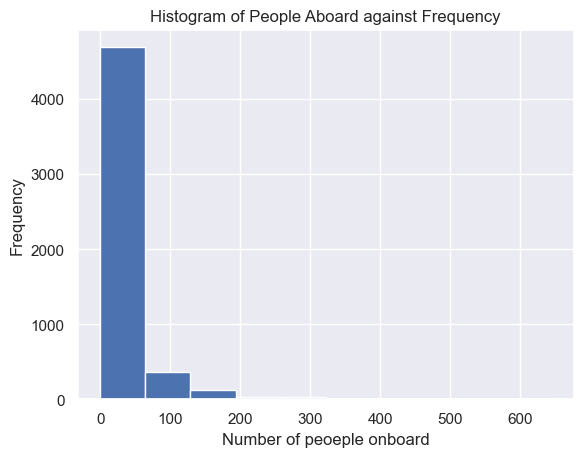

In [31]:
# understanding distribution spread in int/float labels to select the best method of imputation
# working with the Aboard label
fig, ax = plt.subplots()
ax.hist(df["Aboard"], bins = 10)
ax.set(title = "Histogram of People Aboard against Frequency", xlabel = "Number of peoeple onboard", ylabel='Frequency')

In [32]:
max(df['Aboard']), min(df["Aboard"])

(644.0, 0.0)

In [33]:
import math
def calculate_class_frequency(df, cw, label):
    """
    Divides numerical data into classes and returns the class frequency along with the classes.

    Args:
        df = dataframe
        label = label
        cw = class width

    Returns:
        List: A list containing two lists (2D array) - the classes and their corresponding frequencies.
    """
    # Section 1: populating class boundaries
    data = df[label]
    data_max = int(max(data))
    data_min = int(min(data))
    class_boundaries = []
    output = []
    for i in range(data_min, data_max + 1, cw):
        lower_bound = i 
        upper_bound = i + (cw - 1)
        class_boundaries.append([lower_bound, upper_bound])

    # Section 2: Calculating Class frequencies

    for boundary in class_boundaries:
        class_frequency = 0
        for data_point in data:
            if data_point <= boundary[1] and data_point >= boundary[0]:
                class_frequency += 1

        output.append([f"{boundary[0]}-{boundary[1]}", class_frequency])

    return output

# testing result = successful

In [34]:
# testing calculate_class_frequencies_function
np.random.seed(2)
test_arr = np.random.randint(1, 50, 20)

In [35]:
test_arr

array([41, 16, 46,  9, 23, 44, 19, 12, 41,  8, 35, 32, 12, 22, 48, 32, 27,
       21, 38, 40])

In [36]:
max(test_arr)

48

In [37]:
min(test_arr)

8

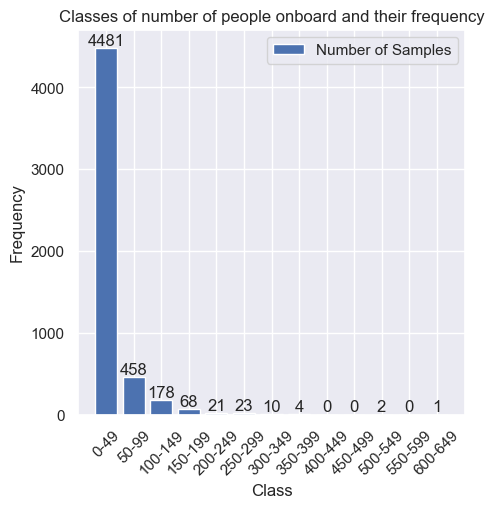

In [38]:
# plotting classes of people onboard against frequency
class_data = pd.DataFrame((calculate_class_frequency(df = df, label = 'Aboard', cw = 50)), columns = ['Class Boundaries', 'Frequency'])
cb = class_data['Class Boundaries']
freq = class_data['Frequency']

fig, ax = plt.subplots(figsize = (5, 5))
ax.bar(cb, freq, label = 'Number of Samples')
ax.legend()
for i, v in enumerate(freq):
    ax.annotate(str(v), (i, v), ha='center', va='bottom')
ax.set(title = 'Classes of number of people onboard and their frequency', ylabel='Frequency', xlabel='Class')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
fig.savefig(r'C:\Users\Anhad Singh Narang\Documents\Work\Data Science\aircraft-crashes-eda\visualizations\class-frequency-bar-plot-aboard.jpeg')

With the aforementioned analysis, one can clearly identify the presence of significant outliers and the number of passengers onboard to be usually between 0 and 100. For the same reason, we will now limit the `df['Aboard']` series between 0 and 100 for the next plot



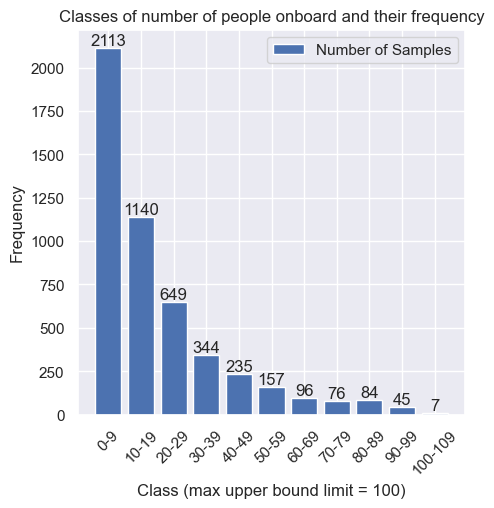

In [39]:
# plotting classes of people onboard against frequency with constrictions
class_data = pd.DataFrame((calculate_class_frequency(df = df[df.Aboard <= 100], label = 'Aboard', cw = 10)), columns = ['Class Boundaries', 'Frequency'])
cb = class_data['Class Boundaries']
freq = class_data['Frequency']

fig, ax = plt.subplots(figsize = (5, 5))
ax.bar(cb, freq, label = 'Number of Samples')
ax.legend()
for i, v in enumerate(freq):
    ax.annotate(str(v), (i, v), ha='center', va='bottom')
ax.set(title = 'Classes of number of people onboard and their frequency', ylabel='Frequency', xlabel='Class (max upper bound limit = 100)')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
fig.savefig(r'C:\Users\Anhad Singh Narang\Documents\Work\Data Science\aircraft-crashes-eda\visualizations\class-frequency-bar-plot-aboard-with-constrictions.jpeg')

Since the dataset is hugely imbalanced with nearly 40% of the data lying in the class of 0-9, median would be the best method of imputation for the `Aboard` label.

In [103]:
df['Aboard'].fillna(df['Aboard'].median(), inplace=True)

 A similar workflow will now be conducted for the labels of fatalities and ground

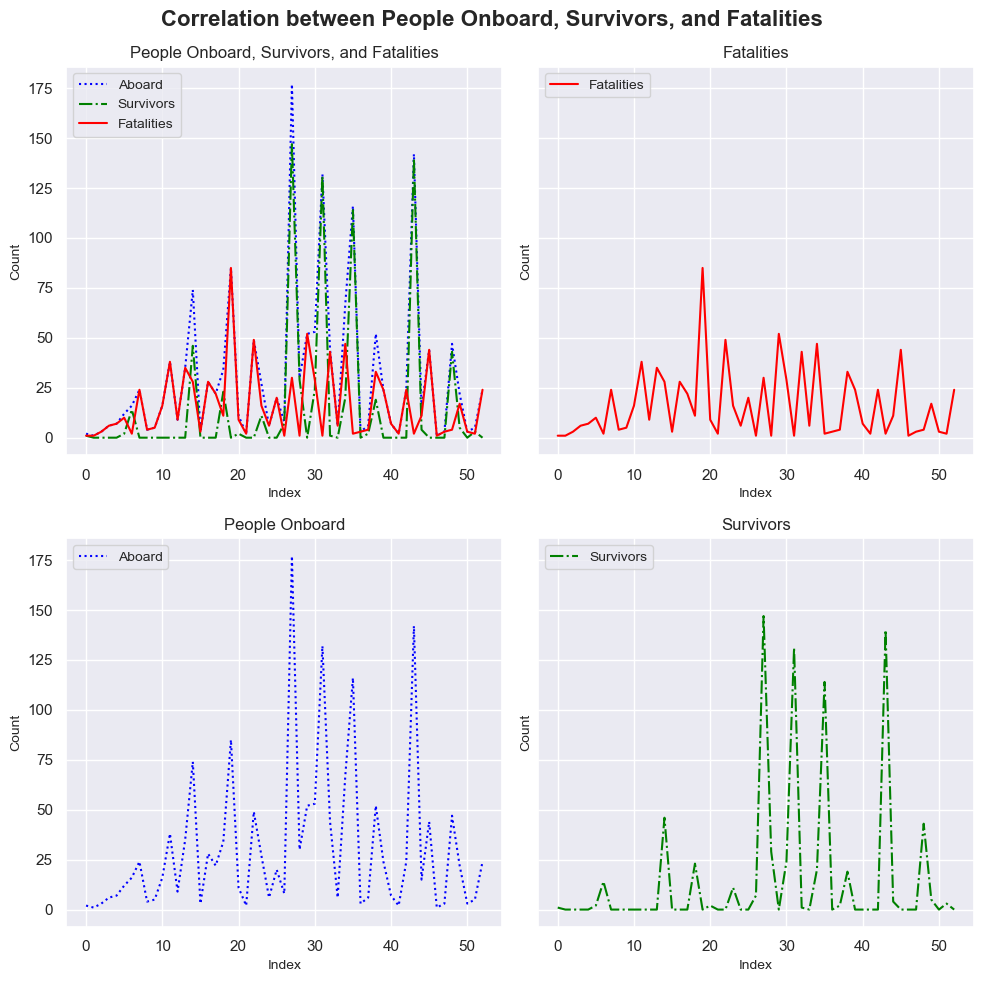

In [58]:
sns.set()

# Create the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharey=True)
fig.suptitle('Correlation between People Onboard, Survivors, and Fatalities', fontsize=16, fontweight='bold')

# Main plot
ax[0, 0].plot(np.arange(0, len(df[::100])), df['Aboard'][::100], label='Aboard', linestyle=':', color='blue')
ax[0, 0].plot(np.arange(0, len(df[::100])), df['Survivors'][::100], label='Survivors', linestyle='-.', color='green')
ax[0, 0].plot(np.arange(0, len(df[::100])), df['Fatalities'][::100], label='Fatalities', linestyle='-', color='red')
ax[0, 0].legend(loc='upper left', fontsize=10)
ax[0, 0].set_title('People Onboard, Survivors, and Fatalities', fontsize=12)
ax[0, 0].set_xlabel('Index', fontsize=10)
ax[0, 0].set_ylabel('Count', fontsize=10)

# Fatalities plot
ax[0, 1].plot(np.arange(0, len(df[::100])), df['Fatalities'][::100], label='Fatalities', linestyle='-', color='red')
ax[0, 1].legend(loc='upper left', fontsize=10)
ax[0, 1].set_title('Fatalities', fontsize=12)
ax[0, 1].set_xlabel('Index', fontsize=10)
ax[0, 1].set_ylabel('Count', fontsize=10)

# Aboard Plot
ax[1, 0].plot(np.arange(0, len(df[::100])), df['Aboard'][::100], label='Aboard', linestyle=':', color='blue')
ax[1, 0].set_title('People Onboard', fontsize=12)
ax[1, 0].set_xlabel('Index', fontsize=10)
ax[1, 0].set_ylabel('Count', fontsize=10)
ax[1, 0].legend(loc='upper left', fontsize=10)

# Survivors plot
ax[1, 1].plot(np.arange(0, len(df[::100])), df['Survivors'][::100], label='Survivors', linestyle='-.', color='green')
ax[1, 1].set_title('Survivors', fontsize=12)
ax[1, 1].set_xlabel('Index', fontsize=10)
ax[1, 1].set_ylabel('Count', fontsize=10)
ax[1, 1].legend(loc='upper left', fontsize=10)
fig.savefig(r'C:\Users\Anhad Singh Narang\Documents\Work\Data Science\aircraft-crashes-eda\visualizations\correlation-bet-onboard-surivors-fatalities.png')
plt.tight_layout()
plt.show()


From the graphic created above, one can identify a more or less equal relationship between the fatalities and the number of people on board. By calculating the average percentage of people on board that are fatalites, we can confirm this idea. This may be calculated by the following funciton f(x, y)

$$f(x, y) = \frac{1}{N}\sum_{i = 1}^N (\frac{y_i}{x_i}\times 100\%)$$ 
where `x` is a list of all onboard the plane, `y` is a list of all fatalities, $x_i$ is an element of the list `x` and $y_i$ is an element of the list `y` 

In [104]:
df['Percent Fatalities'] = (df['Fatalities']/df['Aboard'])*100

In [105]:
np.mean(df['Percent Fatalities'])

83.51140068762919

When dealing with missing values in the fatalities column, filling it with the median value may not be appropriate in certain cases. One specific scenario is when the number of fatalities exceeds the number of people onboard, which violates the logical constraints of the data. In such situations, using the median could result in unrealistic or inaccurate values.

A more suitable approach would be to consider the average percentage of fatalities relative to the number of people onboard. By calculating the average percentage of fatalities over the aboard count, we can estimate a more reasonable value for the missing entries. This method takes into account the overall trend and provides a more reliable estimation of the fatalities based on the available data.

In [106]:
df['Fatalities'].fillna(round(df['Aboard'] * 83.51140068762919/100), inplace = True)

In [107]:
df['Survivors'] = df['Aboard'] - df['Fatalities']

In [108]:
# dates enrichment
date_components = ['year', 'month', 'day', 'dayofweek', 'dayofyear']

for component in date_components:
    df[component] = getattr(df['Date'].dt, component)

In [109]:
df['Aboard'].isna().sum(), df['Aboard'].dtype

(0, dtype('float64'))

Session - ended - 29/06/2023

* items to save --> `df`
* changes applied -->
    1. imputation of the numerical label `Aboard` with the median
    2. Addition of the `Survivors` label
    3. Date Enrichment
    4. imputaton of the numerical label `Fatalities` with 83% of the value in the corresponding `Aboard` label

In [110]:
df.to_csv(r'C:\Users\Anhad Singh Narang\Documents\Work\Data Science\aircraft-crashes-eda\data\dataset-logs\29-06-2023-20_17-df.csv')

Session - began - 30/06/2023 - 10:18


In [111]:
df = pd.read_csv(r'C:\Users\Anhad Singh Narang\Documents\Work\Data Science\aircraft-crashes-eda\data\dataset-logs\29-06-2023-20_17-df.csv')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5268 non-null   int64  
 1   Date                5268 non-null   object 
 2   Time                3049 non-null   object 
 3   Location            5248 non-null   object 
 4   Operator            5250 non-null   object 
 5   Flight #            1069 non-null   object 
 6   Route               3561 non-null   object 
 7   Type                5241 non-null   object 
 8   Registration        4933 non-null   object 
 9   cn/In               4040 non-null   object 
 10  Aboard              5268 non-null   float64
 11  Fatalities          5268 non-null   float64
 12  Ground              5268 non-null   float64
 13  Summary             4878 non-null   object 
 14  Percent Fatalities  5254 non-null   float64
 15  Survivors           5268 non-null   float64
 16  year  

[Text(0.5, 1.0, 'Histogram of the label `Ground`'),
 Text(0.5, 0, 'Ground'),
 Text(0, 0.5, 'Frequency')]

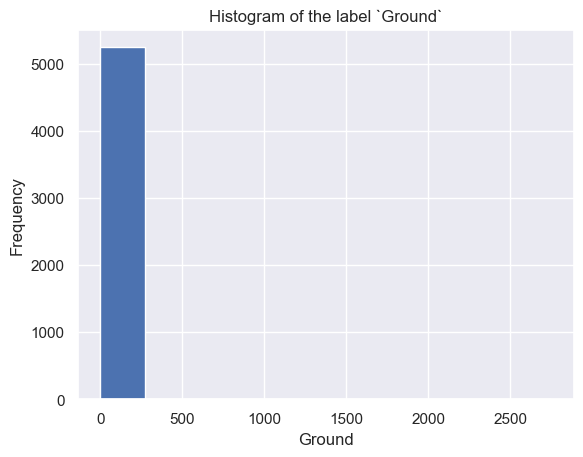

In [74]:
# Numerical imputation of the `Ground` label
# plotting dataspread
fig, ax = plt.subplots()
ax.hist(df['Ground'])
ax.set(title = 'Histogram of the label `Ground`', xlabel = 'Ground', ylabel = 'Frequency')

In [76]:
# finding maximum and minimum values
max(df['Ground']), min(df['Ground'])

(2750.0, 0.0)

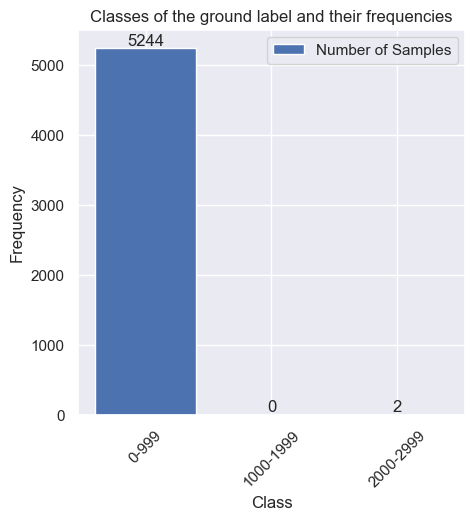

In [78]:
# dataspread as classes
# plotting classes of people onboard against frequency
class_data = pd.DataFrame((calculate_class_frequency(df = df, label = 'Ground', cw = 1000)), columns = ['Class Boundaries', 'Frequency'])
cb = class_data['Class Boundaries']
freq = class_data['Frequency']

fig, ax = plt.subplots(figsize = (5, 5))
ax.bar(cb, freq, label = 'Number of Samples')
ax.legend()
for i, v in enumerate(freq):
    ax.annotate(str(v), (i, v), ha='center', va='bottom')
ax.set(title = 'Classes of the ground label and their frequencies', ylabel='Frequency', xlabel='Class')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
fig.savefig(r'C:\Users\Anhad Singh Narang\Documents\Work\Data Science\aircraft-crashes-eda\visualizations\class-frequency-bar-plot-ground.jpeg')

Plotting with constriction between 0 and 999

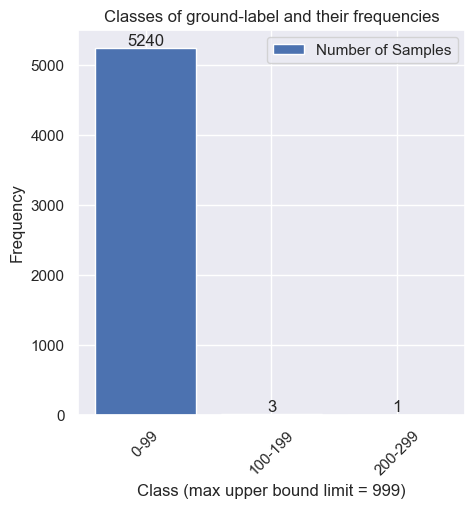

In [88]:
# plotting classes of people onboard against frequency with constrictions
class_data = pd.DataFrame((calculate_class_frequency(df = df[df.Ground <= 999], label = 'Ground', cw = 100)), columns = ['Class Boundaries', 'Frequency'])
cb = class_data['Class Boundaries']
freq = class_data['Frequency']

fig, ax = plt.subplots(figsize = (5, 5))
ax.bar(cb, freq, label = 'Number of Samples')
ax.legend()
for i, v in enumerate(freq):
    ax.annotate(str(v), (i, v), ha='center', va='bottom')
ax.set(title = 'Classes of ground-label and their frequencies', ylabel='Frequency', xlabel='Class (max upper bound limit = 999)')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
fig.savefig(r'C:\Users\Anhad Singh Narang\Documents\Work\Data Science\aircraft-crashes-eda\visualizations\class-frequency-bar-plot-ground-with-constrictions-999.jpeg')

Plotting with constriction of 100

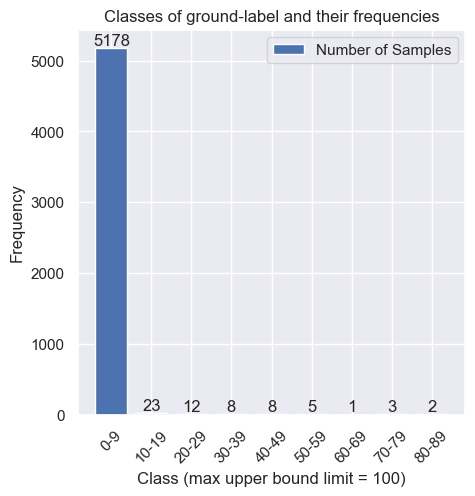

In [89]:
# plotting classes of people onboard against frequency with constrictions
class_data = pd.DataFrame((calculate_class_frequency(df = df[df['Ground'] <= 100], label = 'Ground', cw = 10)), columns = ['Class Boundaries', 'Frequency'])
cb = class_data['Class Boundaries']
freq = class_data['Frequency']

fig, ax = plt.subplots(figsize = (5, 5))
ax.bar(cb, freq, label = 'Number of Samples')
ax.legend()
for i, v in enumerate(freq):
    ax.annotate(str(v), (i, v), ha='center', va='bottom')
ax.set(title = 'Classes of ground-label and their frequencies', ylabel='Frequency', xlabel='Class (max upper bound limit = 100)')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
fig.savefig(r'C:\Users\Anhad Singh Narang\Documents\Work\Data Science\aircraft-crashes-eda\visualizations\class-frequency-bar-plot-ground-with-constrictions-100.jpeg')

The `Ground` label itself is hugely imbalanced therefore the median of the dataset would be the best method for numerical imputation

In [113]:
df['Ground'].fillna(df['Ground'].median(), inplace = True)

In [114]:
df.Ground.isna().sum(), df.Aboard.isna().sum(), df.Fatalities.isna().sum(), df.Survivors.isna().sum()

(0, 0, 0, 0)

The data imputation done till now is sufficient enough for solving the first question: "Yearly how many planes crashed? how many people were on board? how many survived? how many died?"

In [120]:
def calculate_crashes_people_onboard_survived_fatalities_per_year(df):
    """
    Calculates the yearly number of crashes, people onboard, survivors, and fatalities.

    Args:
        df (DataFrame): Input DataFrame containing aircraft crash data.

    Returns:
        CrashData: Object with the following attributes:
            - 'Years': Unique years
            - 'Crashes': Number of crashes in each year
            - 'Aboard': Total number of people onboard in each year
            - 'Survived': Total number of survivors in each year
            - 'Fatalities': Total number of fatalities in each year
    """
    Crashes = []
    Aboard = []
    Survived = []
    Fatalities = []

    Years = df['year'].unique()
    for year in Years:
        crash_count = len(df[df['year'] == year])
        Crashes.append(crash_count)

        aboard_count = np.sum(df[df['year'] == year]['Aboard'])
        Aboard.append(aboard_count)

        survivors_count = np.sum(df[df['year'] == year]['Survivors'])
        Survived.append(survivors_count)

        fatalities_count = np.sum(df[df['year'] == year]['Fatalities'])
        Fatalities.append(fatalities_count)

    class CrashData:
        def __init__(self, years, crashes, aboard, survived, fatalities):
            self.Years = years
            self.Crashes = crashes
            self.Aboard = aboard
            self.Survived = survived
            self.Fatalities = fatalities

    crash_data = CrashData(Years, Crashes, Aboard, Survived, Fatalities)
    return crash_data




In [121]:
CrashData_output = calculate_crashes_people_onboard_survived_fatalities_per_year(df = df)

In [125]:
len(CrashData_output.Years), len(CrashData_output.Aboard), len(CrashData_output.Crashes), len(CrashData_output.Survived), len(CrashData_output.Fatalities)

(98, 98, 98, 98, 98)

In [123]:
CrashData_output.Aboard

[2.0,
 5.0,
 51.0,
 60.0,
 109.0,
 124.0,
 65.0,
 18.0,
 31.0,
 69.0,
 91.0,
 68.0,
 80.0,
 18.0,
 45.0,
 73.0,
 134.0,
 152.0,
 176.0,
 113.0,
 87.0,
 212.0,
 175.0,
 299.0,
 325.0,
 331.0,
 476.0,
 197.0,
 222.0,
 279.0,
 507.0,
 682.0,
 695.0,
 1429.0,
 1524.0,
 1569.0,
 1524.0,
 1320.0,
 1553.0,
 1328.0,
 1812.0,
 1501.0,
 1492.0,
 2681.0,
 1180.0,
 1159.0,
 1633.0,
 1498.0,
 1490.0,
 2445.0,
 1249.0,
 1914.0,
 3433.0,
 1831.0,
 1717.0,
 1546.0,
 2130.0,
 2308.0,
 2339.0,
 2928.0,
 2383.0,
 2567.0,
 3037.0,
 2459.0,
 3635.0,
 3064.0,
 2629.0,
 2675.0,
 2722.0,
 2457.0,
 2701.0,
 1563.0,
 2352.0,
 3176.0,
 2220.0,
 1647.0,
 2568.0,
 3480.0,
 3656.0,
 2396.0,
 2978.0,
 2419.0,
 3106.0,
 2112.0,
 3058.0,
 2485.0,
 2011.0,
 2758.0,
 2111.0,
 2370.0,
 1798.0,
 1508.0,
 937.0,
 2164.0,
 1413.0,
 1364.0,
 1463.0,
 891.0]

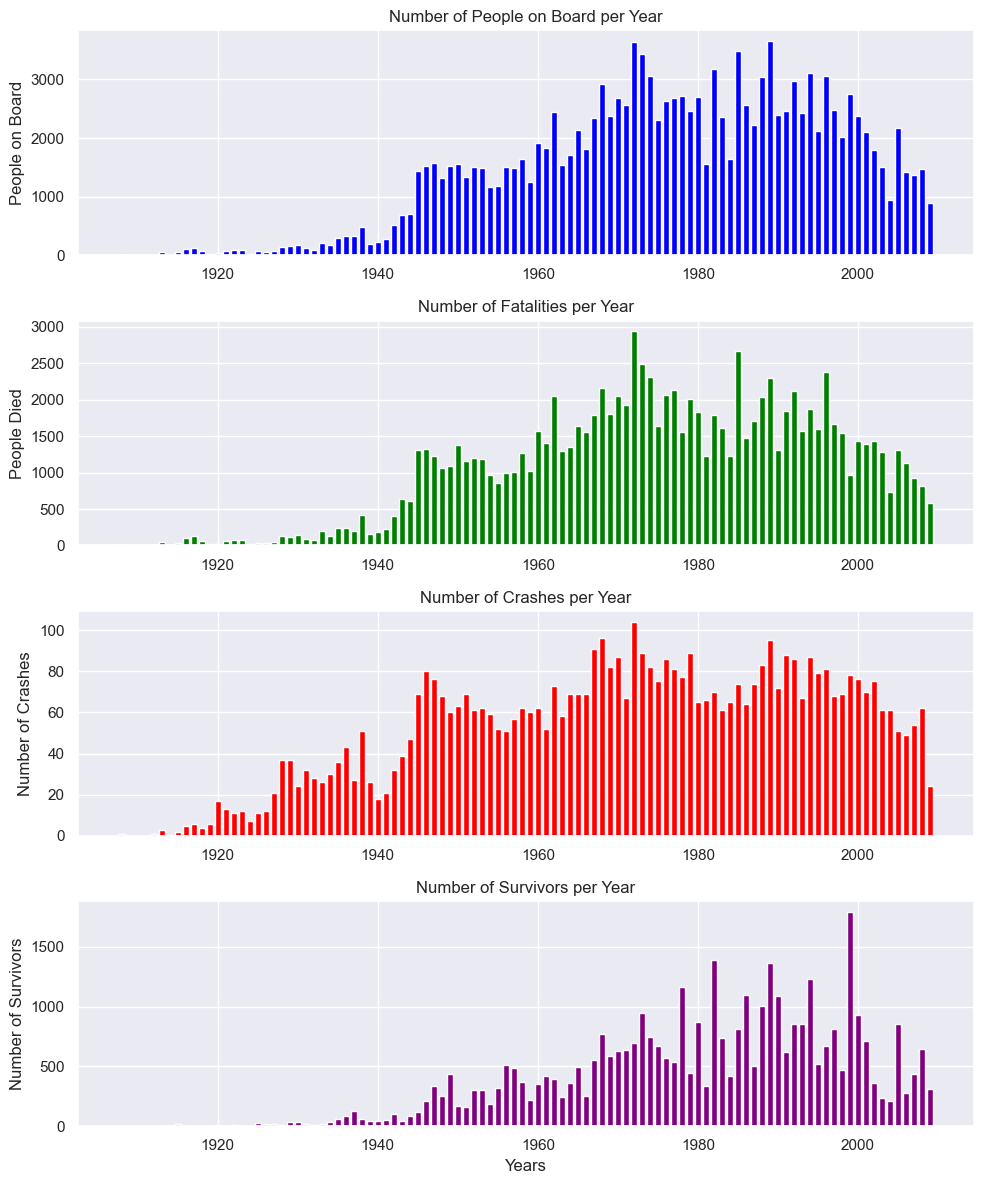

In [132]:
import matplotlib.pyplot as plt

# Extract the data lists from CrashData_output
years = CrashData_output.Years
aboard = CrashData_output.Aboard
fatalities = CrashData_output.Fatalities
crashes = CrashData_output.Crashes
survivors = CrashData_output.Survived

# Define a color palette for the line plots
colors = ['blue', 'green', 'red', 'purple']

# Create a figure with subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

# Plot 1: People on Board
ax1.bar(years, aboard, color=colors[0])
ax1.set_ylabel('People on Board')
ax1.set_title('Number of People on Board per Year')

# Plot 2: People Died (Fatalities)
ax2.bar(years, fatalities, color=colors[1])
ax2.set_ylabel('People Died')
ax2.set_title('Number of Fatalities per Year')

# Plot 3: Number of Crashes
ax3.bar(years, crashes, color=colors[2])
ax3.set_ylabel('Number of Crashes')
ax3.set_title('Number of Crashes per Year')

# Plot 4: Number of Survivors
ax4.bar(years, survivors, color=colors[3])
ax4.set_ylabel('Number of Survivors')
ax4.set_xlabel('Years')
ax4.set_title('Number of Survivors per Year')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

fig.savefig('question1')

Text(0.5, 1.0, 'Proportion of Survivors over Total Aboard over the years')

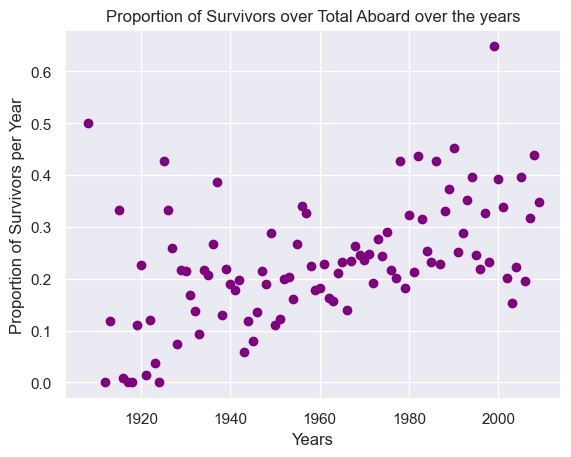

In [141]:
# proportion of survivors over total aboard over the years
fig, ax4 = plt.subplots()
survivors_proportion = np.array(CrashData_output.Survived) / np.array(CrashData_output.Aboard)
ax4.scatter(years, survivors_proportion, color=colors[3])
ax4.set_ylabel('Proportion of Survivors per Year')
ax4.set_xlabel('Years')
ax4.set_title('Proportion of Survivors over Total Aboard over the years')


Session - ended - 30/06/2023 (12:20)

* items to save --> `df`, visualizations
* changes applied -->
    1. imputation of the numerical label `Aboard` with the median
    2. Addition of the `Survivors` label
    3. Date Enrichment
    4. imputaton of the numerical label `Fatalities` with 83% of the value in the corresponding `Aboard` label
    5. imputation of the numerical label `Ground` with the median
    6. addition of the `Percent Fatalities` column

In [142]:
df.to_csv(r'C:\Users\Anhad Singh Narang\Documents\Work\Data Science\aircraft-crashes-eda\data\dataset-logs\30-06-2023-12_20-df.csv')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5268 non-null   int64  
 1   Date                5268 non-null   object 
 2   Time                3049 non-null   object 
 3   Location            5248 non-null   object 
 4   Operator            5250 non-null   object 
 5   Flight #            1069 non-null   object 
 6   Route               3561 non-null   object 
 7   Type                5241 non-null   object 
 8   Registration        4933 non-null   object 
 9   cn/In               4040 non-null   object 
 10  Aboard              5268 non-null   float64
 11  Fatalities          5268 non-null   float64
 12  Ground              5268 non-null   float64
 13  Summary             4878 non-null   object 
 14  Percent Fatalities  5254 non-null   float64
 15  Survivors           5268 non-null   float64
 16  year  